In [518]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import plotly.tools as tls
%matplotlib inline

In [519]:
file = 'Food_Production.csv'
df = pd.read_csv(file)

In [520]:
df.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


In [521]:
drop_df = df.dropna()
drop_df.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.60,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.80,3.943662,49576.3,69825.77465,13449.891480
5,Potatoes,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3,4.754098,...,347.647059,59.1,0.628415,2.705882,1.202186,0.88,5.176471,2754.2,16201.17647,3762.568306
11,Nuts,-2.1,0.0,2.1,0.0,0.1,0.1,0.0,0.2,3.113821,...,2531.414574,4133.8,0.069919,0.263319,2.107317,12.96,7.936314,229889.8,140777.58730,37380.455280
12,Groundnuts,0.4,0.0,1.4,0.4,0.1,0.1,0.0,2.4,2.437931,...,707.524828,1852.3,0.556897,1.233766,1.570690,9.11,3.479756,61797.9,23605.00382,10654.810340


In [522]:
food_df = drop_df.reset_index(drop = True)
food_df.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.60,5.846154,18786.2,14450.92308,7162.104461
1,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.80,3.943662,49576.3,69825.77465,13449.891480
2,Potatoes,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3,4.754098,...,347.647059,59.1,0.628415,2.705882,1.202186,0.88,5.176471,2754.2,16201.17647,3762.568306
3,Nuts,-2.1,0.0,2.1,0.0,0.1,0.1,0.0,0.2,3.113821,...,2531.414574,4133.8,0.069919,0.263319,2.107317,12.96,7.936314,229889.8,140777.58730,37380.455280
4,Groundnuts,0.4,0.0,1.4,0.4,0.1,0.1,0.0,2.4,2.437931,...,707.524828,1852.3,0.556897,1.233766,1.570690,9.11,3.479756,61797.9,23605.00382,10654.810340


In [523]:
chart_df= food_df.groupby("Food product")['Total_emissions'].sum().reset_index()
trace = go.Scatter(
    y = chart_df.Total_emissions,
    x = chart_df["Food product"],
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = chart_df.Total_emissions*2,
        color = chart_df.Total_emissions,
        colorscale='Picnic',
        showscale=True
    )
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Kg of CO2 per Kg of Food Produced',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Kg of CO2',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
plt.savefig('Kg of CO2 per Kg of Food Produced_race.png')
py.iplot(fig,filename='scatterplot')

<Figure size 432x288 with 0 Axes>

In [524]:
emissions_df =food_df[['Food product', 'Total_emissions','Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)','Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)' ]]
emissions_df.head(25)

,Food product,Total_emissions,Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)
0,Oatmeal,1.6,0.945482,1.907692
1,Rice,4.0,1.207271,6.267606
2,Potatoes,0.3,0.628415,2.705882
3,Nuts,0.2,0.069919,0.263319
4,Groundnuts,2.4,0.556897,1.233766
5,Tomatoes,1.4,11.000000,19.000000
6,Onions & Leeks,0.3,1.351351,3.846154
7,Root Vegetables,0.3,1.162162,4.300000
8,Brassicas,0.4,3.000000,4.636364
9,Citrus Fruit,0.3,1.218750,6.500000


In [525]:
plant_df = emissions_df.iloc[:15,:] 
animal_df = emissions_df.iloc[15:,:]

In [526]:
plant_df.head(15)

,Food product,Total_emissions,Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)
0,Oatmeal,1.6,0.945482,1.907692
1,Rice,4.0,1.207271,6.267606
2,Potatoes,0.3,0.628415,2.705882
3,Nuts,0.2,0.069919,0.263319
4,Groundnuts,2.4,0.556897,1.233766
5,Tomatoes,1.4,11.000000,19.000000
6,Onions & Leeks,0.3,1.351351,3.846154
7,Root Vegetables,0.3,1.162162,4.300000
8,Brassicas,0.4,3.000000,4.636364
9,Citrus Fruit,0.3,1.218750,6.500000


In [527]:
animal_df = animal_df.reset_index(drop = True)
animal_df.head(15)

,Food product,Total_emissions,Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)
0,Beef (beef herd),59.6,36.439560,49.889669
1,Beef (dairy herd),21.1,12.197802,16.869301
2,Lamb & Mutton,24.5,12.529968,19.850075
3,Pig Meat,7.2,5.150628,7.608158
4,Poultry Meat,6.1,5.335135,5.698614
5,Milk,2.8,5.250000,9.500000
6,Cheese,21.2,6.170543,10.815217
7,Eggs,4.5,3.243056,4.208724
8,Fish (farmed),5.1,7.614525,5.976759


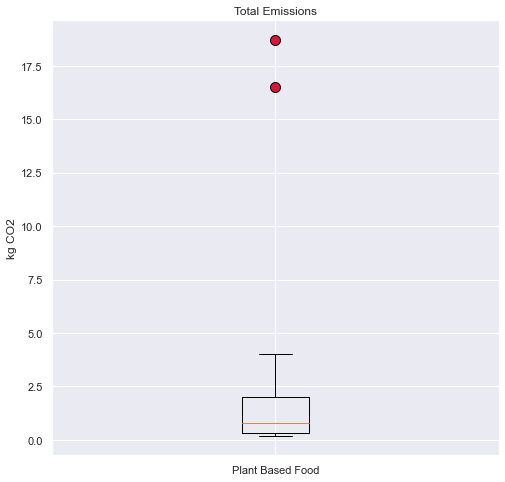

The lower quantile of Total Emissions is: 0.300000
The upper quantile of Total Emissions is: 2.000000
The interquartile rang of Total Emissions is: 1.700000
The lower bound of Total Emissions is: -2.250000
The upper bound of Total Emissions is: 2.850000
The median of Total Emissions is: 0.800000
The mean of Total Emissions is: 3.240000


In [528]:
plt.figure(figsize=(8,8))
total_median = plant_df['Total_emissions'].median()
total_mean = plant_df['Total_emissions'].mean()
total_quantiles = plant_df['Total_emissions'].quantile([0.25, 0.5, 0.75])
total_lowerq = total_quantiles[0.25]
total_upperq = total_quantiles[0.75]
total_iqr = total_upperq - total_lowerq
total_lower_bound = total_lowerq - (1.5 * total_iqr)
total_upper_bound = total_lowerq + (1.5 * total_iqr)
outlier_plt = dict(markerfacecolor = 'crimson', markersize = 10)
plt.boxplot(plant_df['Total_emissions'], flierprops = outlier_plt)
plt.title('Total Emissions')
plt.ylabel('kg CO2')
plt.xticks([1], ['Plant Based Food'])
plt.savefig('Total Emissions_Plant.png')
plt.show()
print(f'The lower quantile of Total Emissions is: {total_lowerq:2f}')
print(f'The upper quantile of Total Emissions is: {total_upperq:2f}')
print(f'The interquartile rang of Total Emissions is: {total_iqr:2f}')
print(f'The lower bound of Total Emissions is: {total_lower_bound:2f}')
print(f'The upper bound of Total Emissions is: {total_upper_bound:2f}')
print(f'The median of Total Emissions is: {total_median:2f}')
print(f'The mean of Total Emissions is: {total_mean:2f}')

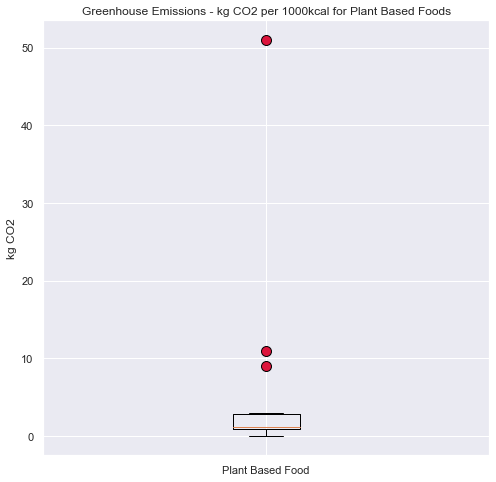

The lower quantile of Greenhouse Emissions - kg CO2 per 1000kcal is: 0.920658
The upper quantile of Greenhouse Emissions - kg CO2 per 1000kcal is: 2.842105
The interquartile range of Greenhouse Emissions - kg CO2 per 1000kcal is: 1.921447
The lower bound of Greenhouse Emissions - kg CO2 per 1000kcal is: -1.961513
The upper bound of Greenhouse Emissions - kg CO2 per 1000kcal is: 3.802829
The median of Greenhouse Emissions - kg CO2 per 1000kcal is: 1.218750
The mean of Greenhouse Emissions - kg CO2 per 1000kcal is: 5.741551


In [529]:
plt.figure(figsize=(8,8))
kal_median = plant_df['Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)'].median()
kal_mean = plant_df['Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)'].mean()
kal_quantiles = plant_df['Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)'].quantile([0.25, 0.5, 0.75])
kal_lowerq = kal_quantiles[0.25]
kal_upperq = kal_quantiles[0.75]
kal_iqr = kal_upperq - kal_lowerq
kal_lower_bound = kal_lowerq - (1.5 * kal_iqr)
kal_upper_bound = kal_lowerq + (1.5 * kal_iqr)
outlier_plt = dict(markerfacecolor = 'crimson', markersize = 10)
plt.boxplot(plant_df['Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)'], flierprops = outlier_plt)
plt.title('Greenhouse Emissions - kg CO2 per 1000kcal for Plant Based Foods')
plt.ylabel('kg CO2')
plt.xticks([1], ['Plant Based Food'])
plt.savefig('Greenhouse Emissions - kg CO2 per 1000kcal_Plant.png')
plt.show()
print(f'The lower quantile of Greenhouse Emissions - kg CO2 per 1000kcal is: {kal_lowerq:2f}')
print(f'The upper quantile of Greenhouse Emissions - kg CO2 per 1000kcal is: {kal_upperq:2f}')
print(f'The interquartile range of Greenhouse Emissions - kg CO2 per 1000kcal is: {kal_iqr:2f}')
print(f'The lower bound of Greenhouse Emissions - kg CO2 per 1000kcal is: {kal_lower_bound:2f}')
print(f'The upper bound of Greenhouse Emissions - kg CO2 per 1000kcal is: {kal_upper_bound:2f}')
print(f'The median of Greenhouse Emissions - kg CO2 per 1000kcal is: {kal_median:2f}')
print(f'The mean of Greenhouse Emissions - kg CO2 per 1000kcal is: {kal_mean:2f}')

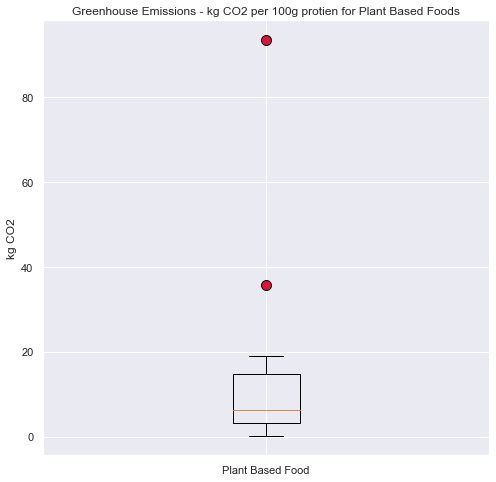

The lower quantile of Greenhouse Emissions - kg CO2 per 100g protien is: 3.276018
The upper quantile of Greenhouse Emissions - kg CO2 per 100g protien is: 14.816667
The interquartile range of Greenhouse Emissions - kgCO2 per 100g protien is: 11.540649
The lower bound of Greenhouse Emissions - kg CO2 per 100g protien is: 0.393847
The upper bound of Greenhouse Emissions - kg CO2 per 100g protien is: 6.158189
The median of Greenhouse Emissions - kg CO2 per 100g protien is: 6.267606
The mean of Greenhouse Emissions - kg CO2 per 100g protien is: 14.587478


In [530]:
plt.figure(figsize=(8,8))
protien_median = plant_df['Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)'].median()
protien_mean = plant_df['Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)'].mean()
protien_quantiles = plant_df['Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)'].quantile([0.25, 0.5, 0.75])
protien_lowerq = protien_quantiles[0.25]
protien_upperq = protien_quantiles[0.75]
protien_iqr = protien_upperq - protien_lowerq
protien_lower_bound = protien_lowerq - (1.5 * kal_iqr)
protien_upper_bound = protien_lowerq + (1.5 * kal_iqr)
outlier_plt = dict(markerfacecolor = 'crimson', markersize = 10)
plt.boxplot(plant_df['Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)'], flierprops = outlier_plt)
plt.title('Greenhouse Emissions - kg CO2 per 100g protien for Plant Based Foods')
plt.ylabel('kg CO2')
plt.xticks([1], ['Plant Based Food'])
plt.savefig('Greenhouse Emissions - kg CO2 per 100g protien_Plant.png')
plt.show()
print(f'The lower quantile of Greenhouse Emissions - kg CO2 per 100g protien is: {protien_lowerq:2f}')
print(f'The upper quantile of Greenhouse Emissions - kg CO2 per 100g protien is: {protien_upperq:2f}')
print(f'The interquartile range of Greenhouse Emissions - kgCO2 per 100g protien is: {protien_iqr:2f}')
print(f'The lower bound of Greenhouse Emissions - kg CO2 per 100g protien is: {protien_lower_bound:2f}')
print(f'The upper bound of Greenhouse Emissions - kg CO2 per 100g protien is: {protien_upper_bound:2f}')
print(f'The median of Greenhouse Emissions - kg CO2 per 100g protien is: {protien_median:2f}')
print(f'The mean of Greenhouse Emissions - kg CO2 per 100g protien is: {protien_mean:2f}')

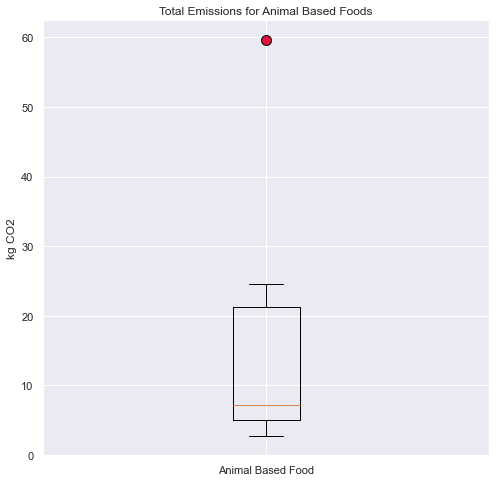

The lower quantile of Total Emissions is: 5.976759
The upper quantile of Total Emissions is: 16.869301
The interquartile rang of Total Emissions is: 10.892541
The lower bound of Total Emissions is: -10.362053
The upper bound of Total Emissions is: 22.315572
The median of Total Emissions:7.200000
The mean of Total Emissions:16.900000


In [531]:
plt.figure(figsize=(8,8))
total_a_median = animal_df['Total_emissions'].median()
total_a_mean = animal_df['Total_emissions'].mean()
total_a_quantiles = animal_df['Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)'].quantile([0.25, 0.5, 0.75])
total_a_lowerq = total_a_quantiles[0.25]
total_a_upperq = total_a_quantiles[0.75]
total_a_iqr = total_a_upperq - total_a_lowerq
total_a_lower_bound = total_a_lowerq - (1.5 * total_a_iqr)
total_a_upper_bound = total_a_lowerq + (1.5 * total_a_iqr)
total_a_plt = dict(markerfacecolor = 'crimson', markersize = 10)
plt.boxplot(animal_df['Total_emissions'], flierprops = outlier_plt)
plt.title('Total Emissions for Animal Based Foods')
plt.ylabel('kg CO2')
plt.xticks([1], ['Animal Based Food'])
plt.savefig('Total Emissions_Animal.png')
plt.show()
print(f'The lower quantile of Total Emissions is: {total_a_lowerq:2f}')
print(f'The upper quantile of Total Emissions is: {total_a_upperq:2f}')
print(f'The interquartile rang of Total Emissions is: {total_a_iqr:2f}')
print(f'The lower bound of Total Emissions is: {total_a_lower_bound:2f}')
print(f'The upper bound of Total Emissions is: {total_a_upper_bound:2f}')
print(f'The median of Total Emissions:{total_a_median:2f}')
print(f'The mean of Total Emissions:{total_a_mean:2f}')

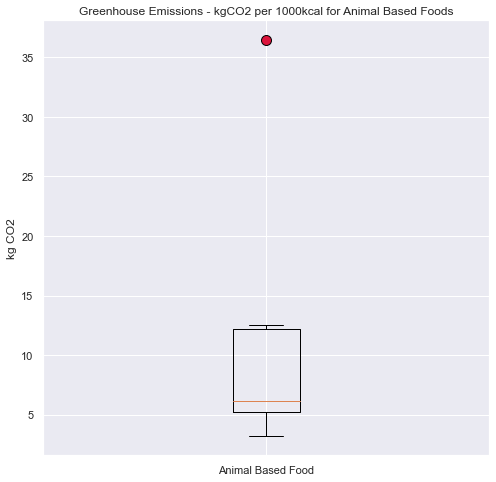

The lower quantile of Greenhouse Emissions - kg CO2 per 1000kcal is: 5.250000
The upper quantile of Greenhouse Emissions - kg CO2 per 1000kcal is: 12.197802
The interquartile range of Greenhouse Emissions - kg CO2 per 1000kcal is: 6.947802
The lower bound of Greenhouse Emissions - kg CO2 per 1000kcal is: -5.171703
The upper bound of Greenhouse Emissions - kg CO2 per 1000kcal is: 15.671703
The median of Greenhouse Emissions - kg CO2 per 1000kcal is: 6.170543
The mean of Greenhouse Emissions - kg CO2 per 1000kcal is: 10.436802


In [532]:
plt.figure(figsize=(8,8))
kal_a_quantiles = animal_df['Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)'].quantile([0.25, 0.5, 0.75])
kal_a_lowerq = kal_a_quantiles[0.25]
kal_a_upperq = kal_a_quantiles[0.75]
kal_a_iqr = kal_a_upperq - kal_a_lowerq
kal_a_lower_bound = kal_a_lowerq - (1.5 * kal_a_iqr)
kal_a_upper_bound = kal_a_lowerq + (1.5 * kal_a_iqr)
kal_a_median = animal_df['Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)'].median()
kal_a_mean = animal_df['Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)'].mean()
outlier_plt = dict(markerfacecolor = 'crimson', markersize = 10)
plt.boxplot(animal_df['Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)'], flierprops = outlier_plt)
plt.title('Greenhouse Emissions - kgCO2 per 1000kcal for Animal Based Foods')
plt.ylabel('kg CO2')
plt.xticks([1], ['Animal Based Food'])
plt.savefig('Greenhouse Emissions - kg CO2 per 1000kcal_Animal.png')
plt.show()
print(f'The lower quantile of Greenhouse Emissions - kg CO2 per 1000kcal is: {kal_a_lowerq:2f}')
print(f'The upper quantile of Greenhouse Emissions - kg CO2 per 1000kcal is: {kal_a_upperq:2f}')
print(f'The interquartile range of Greenhouse Emissions - kg CO2 per 1000kcal is: {kal_a_iqr:2f}')
print(f'The lower bound of Greenhouse Emissions - kg CO2 per 1000kcal is: {kal_a_lower_bound:2f}')
print(f'The upper bound of Greenhouse Emissions - kg CO2 per 1000kcal is: {kal_a_upper_bound:2f}')
print(f'The median of Greenhouse Emissions - kg CO2 per 1000kcal is: {kal_a_median:2f}')
print(f'The mean of Greenhouse Emissions - kg CO2 per 1000kcal is: {kal_a_mean:2f}')

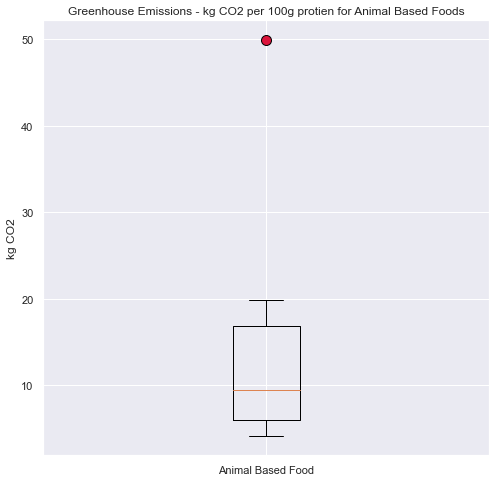

The lower quantile of Greenhouse Emissions - kg CO2 per 100g protien is: 5.976759
The upper quantile of Greenhouse Emissions - kg CO2 per 100g protien is: 16.869301
The interquartile range of Greenhouse Emissions - kg CO2 per 100g protien is: 11.619301
The lower bound of Greenhouse Emissions - kg CO2 per 100g protien is: -11.452192
The upper bound of Greenhouse Emissions - kg CO2 per 100g protienl is: 23.405711
The median of Greenhouse Emissions - kg CO2 per 100g protien is: 9.500000
The mean of Greenhouse Emissions - kg CO2 per 100g protien is: 14.490724


In [533]:
plt.figure(figsize=(8,8))
protien_a_quantiles = animal_df['Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)'].quantile([0.25, 0.5, 0.75])
protien_a_lowerq = protien_a_quantiles[0.25]
protien_a_upperq = protien_a_quantiles[0.75]
protien_a_iqr = protien_a_upperq - kal_a_lowerq
protien_a_lower_bound = protien_a_lowerq - (1.5 * protien_a_iqr)
protien_a_upper_bound = protien_a_lowerq + (1.5 * protien_a_iqr)
protien_a_median = animal_df['Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)'].median()
protien_a_mean = animal_df['Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)'].mean()
outlier_plt = dict(markerfacecolor = 'crimson', markersize = 10)
plt.boxplot(animal_df['Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)'], flierprops = outlier_plt)
plt.title('Greenhouse Emissions - kg CO2 per 100g protien for Animal Based Foods')
plt.ylabel('kg CO2')
plt.xticks([1], ['Animal Based Food'])
plt.savefig('Greenhouse Emissions - kg CO2 per 100g protien_Animal.png')
plt.show()
print(f'The lower quantile of Greenhouse Emissions - kg CO2 per 100g protien is: {protien_a_lowerq:2f}')
print(f'The upper quantile of Greenhouse Emissions - kg CO2 per 100g protien is: {protien_a_upperq:2f}')
print(f'The interquartile range of Greenhouse Emissions - kg CO2 per 100g protien is: {protien_a_iqr:2f}')
print(f'The lower bound of Greenhouse Emissions - kg CO2 per 100g protien is: {protien_a_lower_bound:2f}')
print(f'The upper bound of Greenhouse Emissions - kg CO2 per 100g protienl is: {protien_a_upper_bound:2f}')
print(f'The median of Greenhouse Emissions - kg CO2 per 100g protien is: {protien_a_median:2f}')
print(f'The mean of Greenhouse Emissions - kg CO2 per 100g protien is: {protien_a_mean:2f}')

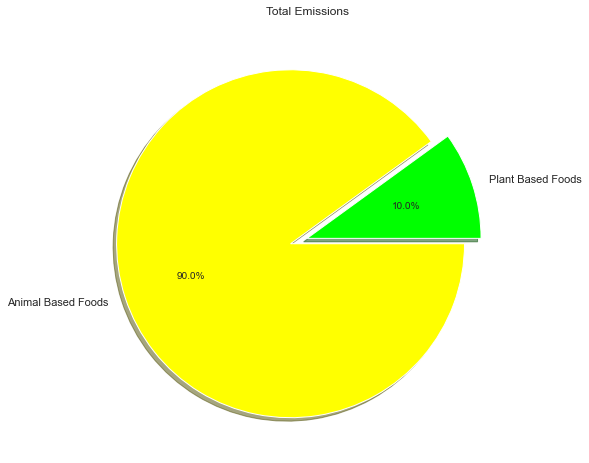

In [534]:
em_sum_plant = plant_df['Total_emissions'].median()
em_sum_animal = animal_df['Total_emissions'].median()
data = [em_sum_plant, em_sum_animal]
explode = [0, 0.1]
labels = 'Plant Based Foods', 'Animal Based Foods'
colors = ['lime', 'yellow']
fig=plt.figure(figsize=(8,8))
plt.pie(data, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True)
plt.title('Total Emissions')
plt.savefig('Total_Emissions_Pie.png')
plt.show()

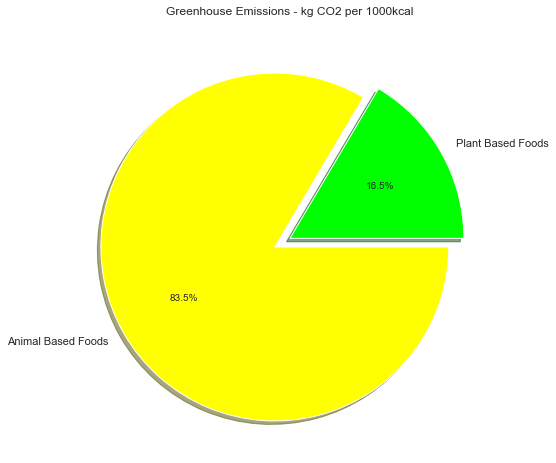

In [535]:
em_sum_plant = plant_df['Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)'].median()
em_sum_animal = animal_df['Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)'].median()
data = [em_sum_plant, em_sum_animal]
explode = [0, 0.1]
labels = 'Plant Based Foods', 'Animal Based Foods'
colors = ['lime', 'yellow']
fig=plt.figure(figsize=(8,8))
plt.pie(data, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True)
plt.title('Greenhouse Emissions - kg CO2 per 1000kcal')
plt.savefig('Greenhouse Emissions - kg CO2 per 1000kcal_Pie.png')
plt.show()

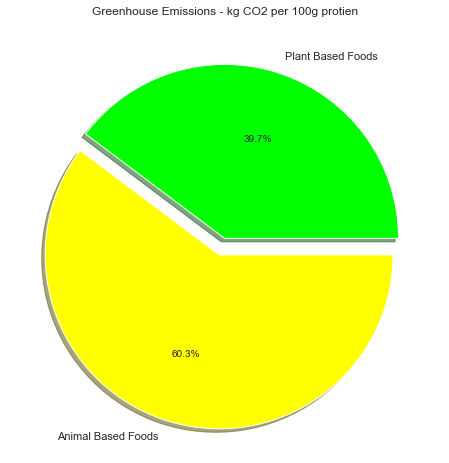

In [536]:
em_sum_plant = plant_df['Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)'].median()
em_sum_animal = animal_df['Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)'].median()
data = [em_sum_plant, em_sum_animal]
explode = [0, 0.1]
labels = 'Plant Based Foods', 'Animal Based Foods'
colors = ['lime', 'yellow']
fig=plt.figure(figsize=(8,8))
plt.pie(data, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True)
plt.title('Greenhouse Emissions - kg CO2 per 100g protien')
plt.savefig('Greenhouse Emissions - kg CO2 per 100g protien_Pie.png')
plt.show()

In [537]:
plant_b = food_df.iloc[:15,:] 
animal_b = food_df.iloc[15:,:]

In [538]:
plant_b = plant_b[['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing','Transport', 'Packging', 'Retail', 'Total_emissions']]
animal_b = animal_b[['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing','Transport', 'Packging', 'Retail', 'Total_emissions']]

In [539]:
plant_b.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions
0,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6
1,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0
2,Potatoes,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3
3,Nuts,-2.1,0.0,2.1,0.0,0.1,0.1,0.0,0.2
4,Groundnuts,0.4,0.0,1.4,0.4,0.1,0.1,0.0,2.4


In [540]:
animal_b.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions
15,Beef (beef herd),16.3,1.9,39.4,1.3,0.3,0.2,0.2,59.6
16,Beef (dairy herd),0.9,2.5,15.7,1.1,0.4,0.3,0.2,21.1
17,Lamb & Mutton,0.5,2.4,19.5,1.1,0.5,0.3,0.2,24.5
18,Pig Meat,1.5,2.9,1.7,0.3,0.3,0.3,0.2,7.2
19,Poultry Meat,2.5,1.8,0.7,0.4,0.3,0.2,0.2,6.1


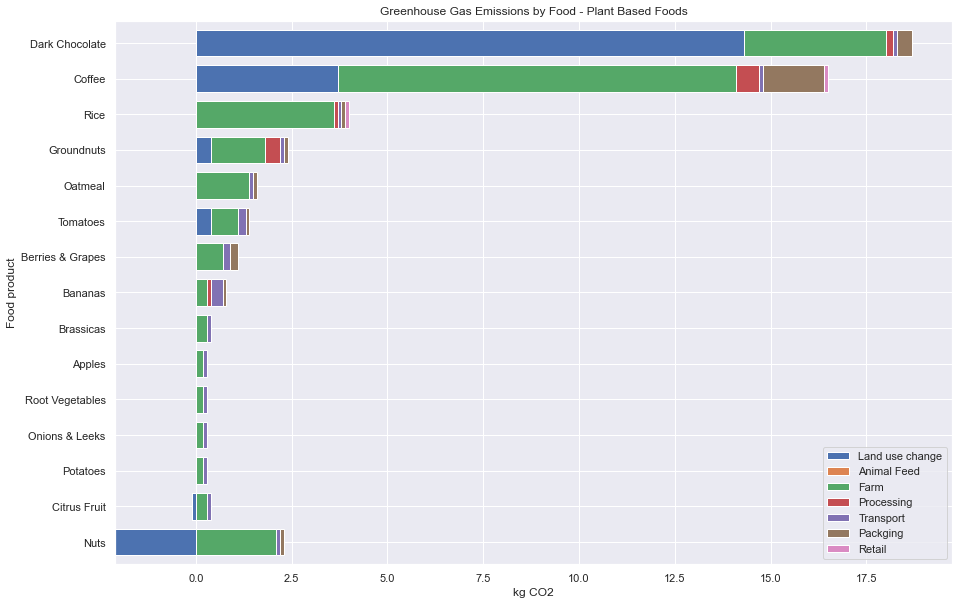

In [541]:
plant_i= plant_b.sort_values(by= "Total_emissions", ascending= True).iloc[:,:8]
fig, ax = plt.subplots(figsize=(15,10))
sns.set()
plant_i.set_index('Food product').plot(kind='barh', width= 0.75, stacked=True, ax= ax)
plt.xlabel('kg CO2')
plt.title('Greenhouse Gas Emissions by Food - Plant Based Foods')
plt.savefig('Greenhouse Emissions by Category_Plant_Pie.png')
plt.show()

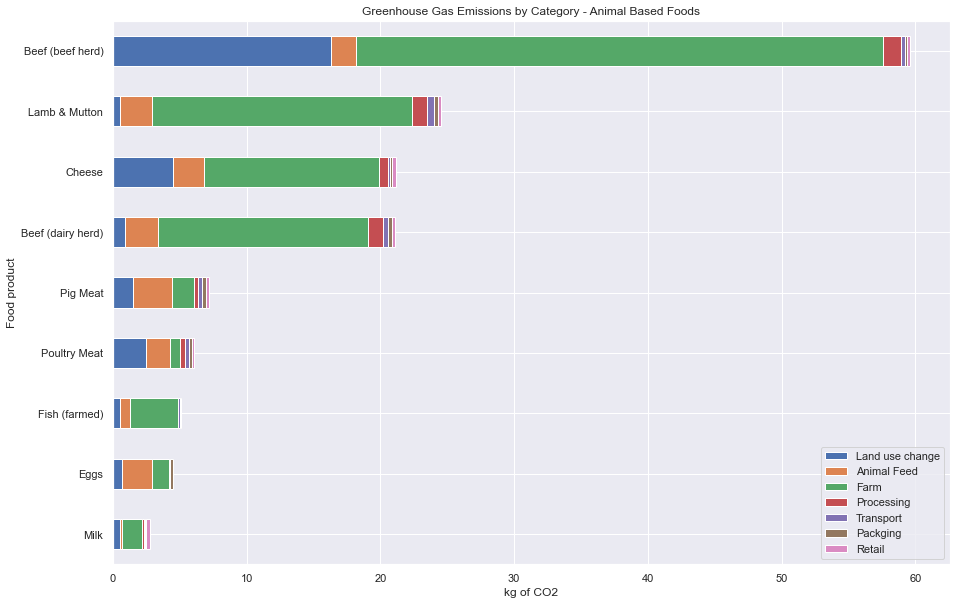

In [542]:
animal_i= animal_b.sort_values(by= "Total_emissions", ascending= True).iloc[:,:8]
fig, ax = plt.subplots(figsize=(15,10))
sns.set()
animal_i.set_index('Food product').plot(kind='barh', width=0.5, stacked=True, ax= ax)
plt.xlabel("kg of CO2")
plt.title('Greenhouse Gas Emissions by Category - Animal Based Foods')
plt.savefig('Greenhouse Emissions by Category_Animal_Pie.png')
plt.show()

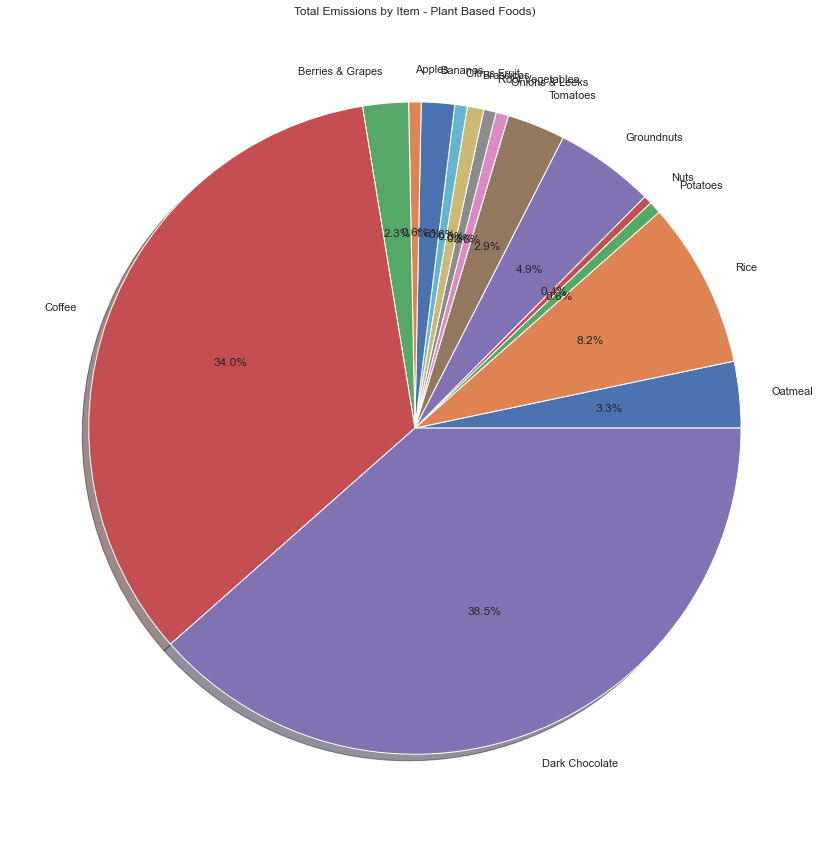

In [543]:
plant = ['Oatmeal','Rice','Potatoes','Nuts','Groundnuts','Tomatoes','Onions & Leeks','Root Vegetables','Brassicas','Citrus Fruit','Bananas',
        'Apples','Berries & Grapes','Coffee', 'Dark Chocolate']
emissions =  [1.6, 4.0, 0.3, 0.2, 2.4, 1.4, 0.3, 0.3, 0.4, 0.3, 0.8, 0.3, 1.1, 16.5, 18.7]
fig=plt.figure(figsize=(15, 15))
plt.title('Total Emissions by Item - Plant Based Foods)')
plt.pie(emissions, labels=plant, autopct="%1.1f%%", shadow=True)
plt.savefig('Total Emissions by Item - Plant Based Foods_Pie.png')
plt.show()

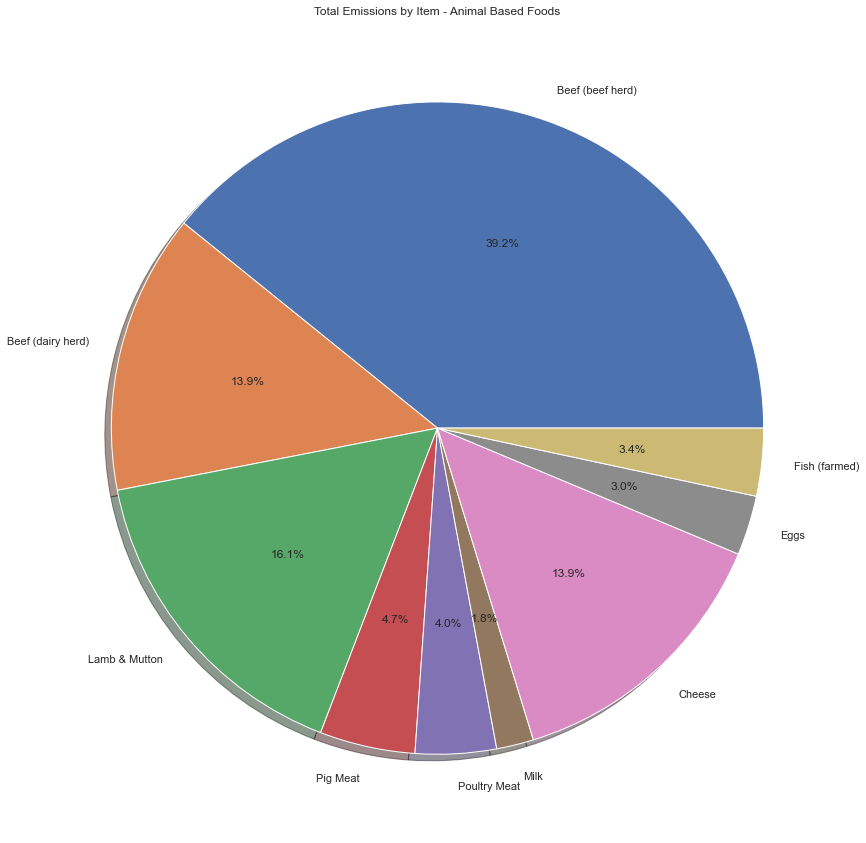

In [544]:
meat = animal_df['Food product']
number = animal_df['Total_emissions']
fig=plt.figure(figsize=(15, 15))
plt.pie(number, labels=meat, autopct="%1.1f%%", shadow=True)
plt.title('Total Emissions by Item - Animal Based Foods')
plt.savefig('Total Emissions by Item - Animal Based Foods_Pie.png')
plt.show()

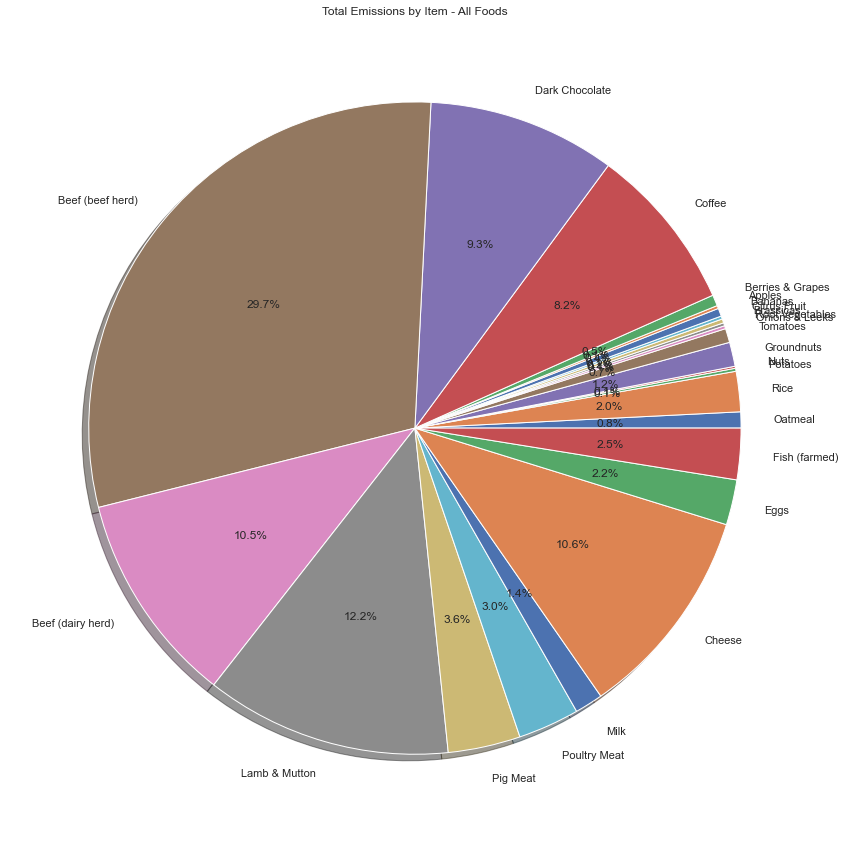

In [545]:
food = food_df['Food product']
count = food_df['Total_emissions']
fig=plt.figure(figsize=(15, 15))
plt.pie(count, labels=food, autopct="%1.1f%%", shadow=True)
plt.title('Total Emissions by Item - All Foods')
plt.savefig('Total Emissions by Item - All Foods_Pie.png')
plt.show()

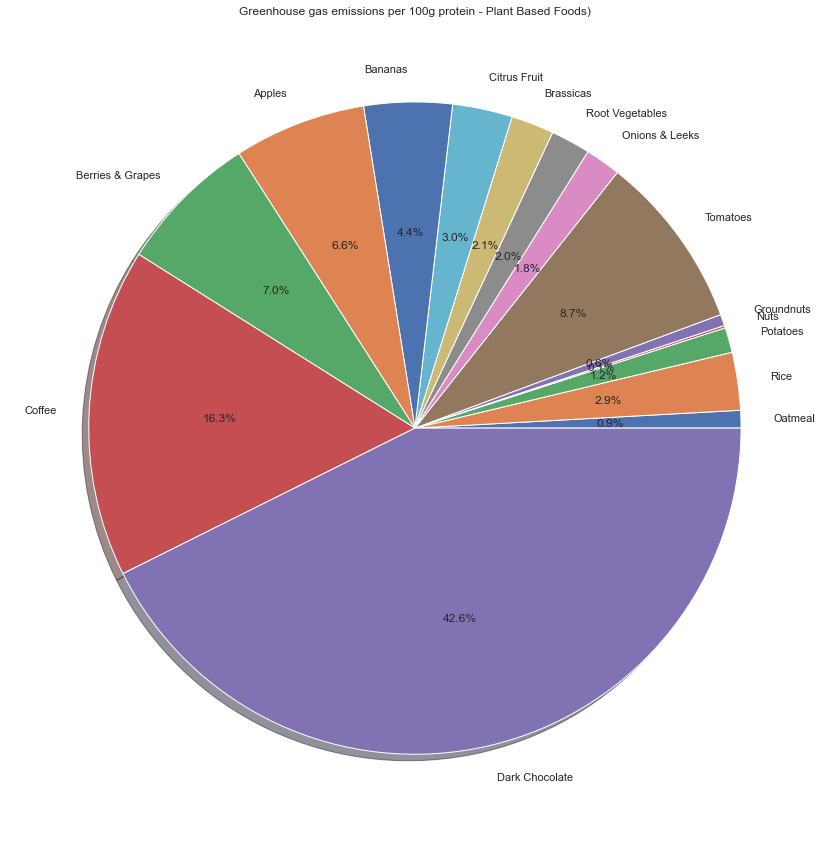

In [546]:
plants = ['Oatmeal','Rice','Potatoes','Nuts','Groundnuts','Tomatoes','Onions & Leeks','Root Vegetables','Brassicas','Citrus Fruit','Bananas',
        'Apples','Berries & Grapes','Coffee', 'Dark Chocolate']
emission =  [1.907692308, 6.267605634, 2.705882353, 0.263319045, 1.233766234, 19, 
3.846153846, 4.3, 4.636363636, 6.5, 9.555555556, 14.33333333, 15.3, 35.6625, 93.3]
fig=plt.figure(figsize=(15, 15))
plt.title('Greenhouse gas emissions per 100g protein - Plant Based Foods)')
plt.pie(emission, labels=plants, autopct="%1.1f%%", shadow=True)
plt.savefig('Greenhouse gas emissions per 100g protein - Plant Based Foods_Pie.png')
plt.show()

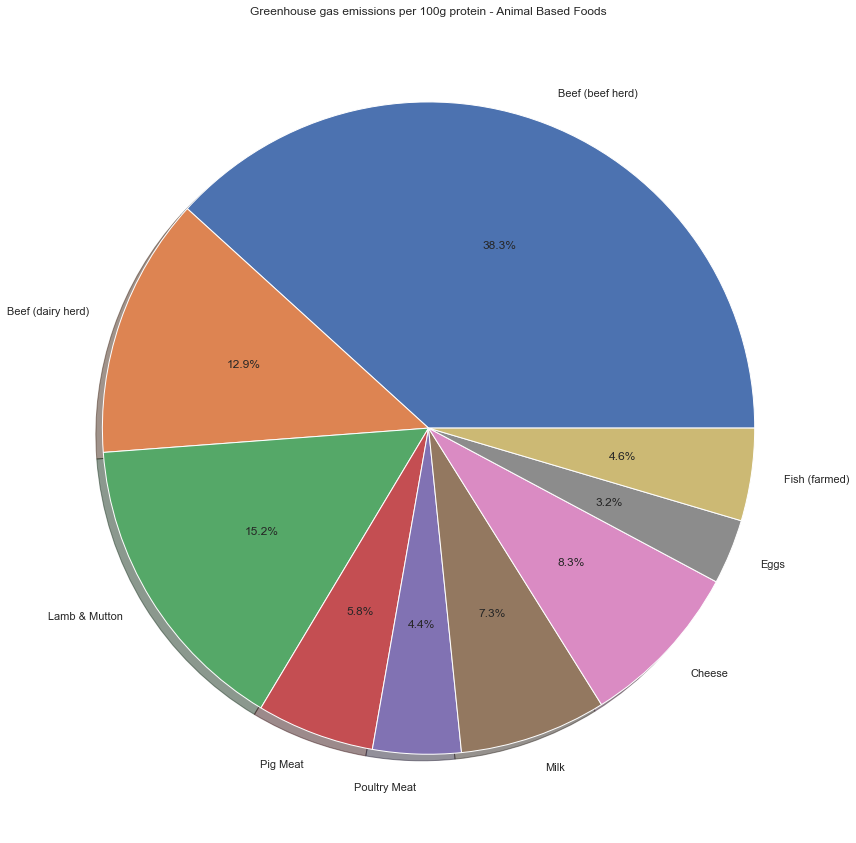

In [547]:
meat = animal_df['Food product']
number = animal_df['Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)']
fig=plt.figure(figsize=(15, 15))
plt.pie(number, labels=meat, autopct="%1.1f%%", shadow=True)
plt.title('Greenhouse gas emissions per 100g protein - Animal Based Foods')
plt.savefig('Greenhouse gas emissions per 100g protein - Animal Based Foods_Pie.png')
plt.show()

In [548]:
total_emiss_sum = food_df['Total_emissions'].sum()
total_kal_sum = food_df['Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)'].sum()
total_pro_sum = food_df['Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)'].sum()
#Create a chart that somehow overlays two charts on one graph

In [549]:
# plant_df
# fig=plt.figure(figsize=(15, 15))
# plt.hist(x, density=True, bins=14)  # `density=False` would make counts
# plt.ylabel('Probability')
# plt.xlabel('Data')
#Histogram to show distrubution of emissions between both animal and plant